In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('cntrbtrs_clnts_ops_trn.csv', sep=';',encoding='ANSI')

C:\Users\scriber\AppData\Local\Temp\ipykernel_23468\283818499.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cntrbtrs_clnts_ops_trn.csv', sep=';',encoding='ANSI')


In [3]:
df.dropna(subset=['rgn'], inplace=True)

In [ ]:
# Группируем данные по регионам и считаем количество целевых значений для каждой группы
df_grouped = df.groupby('rgn')['erly_pnsn_flg'].value_counts(normalize=True).unstack(fill_value=0)

# df_grouped теперь содержит процентное отношение для каждого региона и целевого признака
# Если хотите получить только процент 1 (например, ранние пенсионеры):
df_grouped['erly_pnsn_flg'] = df_grouped[1]* 100
sorted_df = df_grouped.sort_values(by='erly_pnsn_flg', ascending=False)
# Выводим результат

pd.set_option('display.max_rows', None)  # Для вывода всех строк
pd.set_option('display.max_columns', None)  # Для вывода всех колонок

sorted_df[['erly_pnsn_flg']][:100]

In [5]:
specific_regions = ['ТАМБОВСКАЯ ОБЛ', 'ОРЛОВСКАЯ ОБЛ', 'ЧУКОТСКИЙ АО', 'НЕНЕЦКИЙ АО']

# Фильтруем DataFrame по нужным регионам
filtered_df = sorted_df[sorted_df.index.isin(specific_regions)]
filtered_df.drop(filtered_df.columns[[1, 2]], axis=1)
filtered_df = filtered_df.reset_index()
filtered_df = filtered_df[['rgn','erly_pnsn_flg']]

In [52]:
df_pensiya = pd.read_excel('pensiya.xlsx')
df_pensiya.columns = ['rgn','rubs']
merged_df = pd.merge(filtered_df, df_pensiya, on='rgn', how='inner')
merged_df

,rgn,erly_pnsn_flg,rubs
0,НЕНЕЦКИЙ АО,95.238095,31497
1,ЧУКОТСКИЙ АО,50.000000,33715
2,ТАМБОВСКАЯ ОБЛ,1.066841,18743
3,ОРЛОВСКАЯ ОБЛ,0.982659,20185


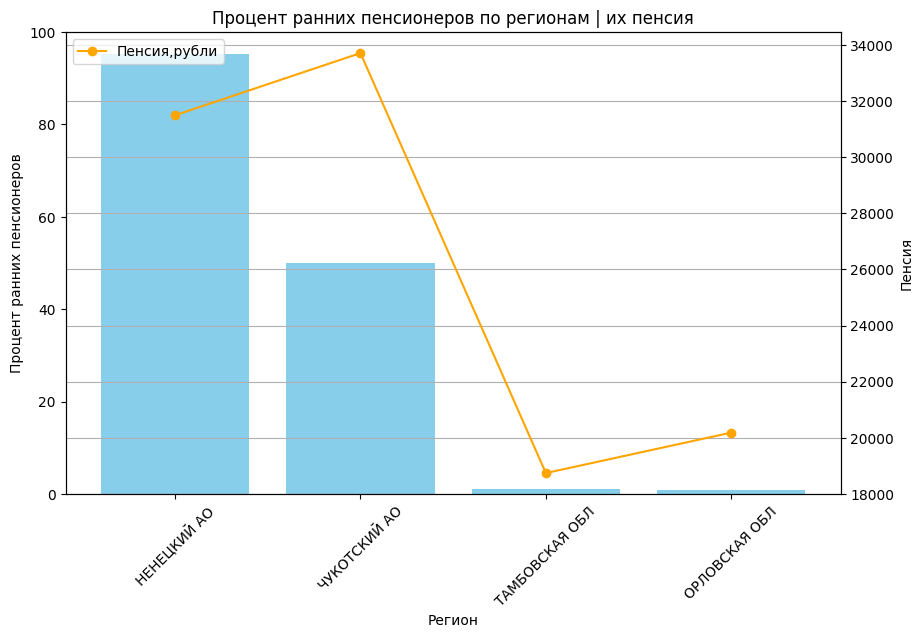

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | их пенсия')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['rubs'], color='orange', marker='o', label='Пенсия,рубли')
plt.ylabel('Пенсия')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Пенсия у ранее вышедших на пенсию - больше!!

In [54]:
df_zarplata = pd.read_excel('zarplata.xlsx')
df_zarplata.columns = ['rgn','rubs']
merged_df = pd.merge(filtered_df, df_zarplata, on='rgn', how='inner')
merged_df

,rgn,erly_pnsn_flg,rubs
0,НЕНЕЦКИЙ АО,95.238095,130879
1,ЧУКОТСКИЙ АО,50.000000,179676
2,ТАМБОВСКАЯ ОБЛ,1.066841,51340
3,ОРЛОВСКАЯ ОБЛ,0.982659,52699


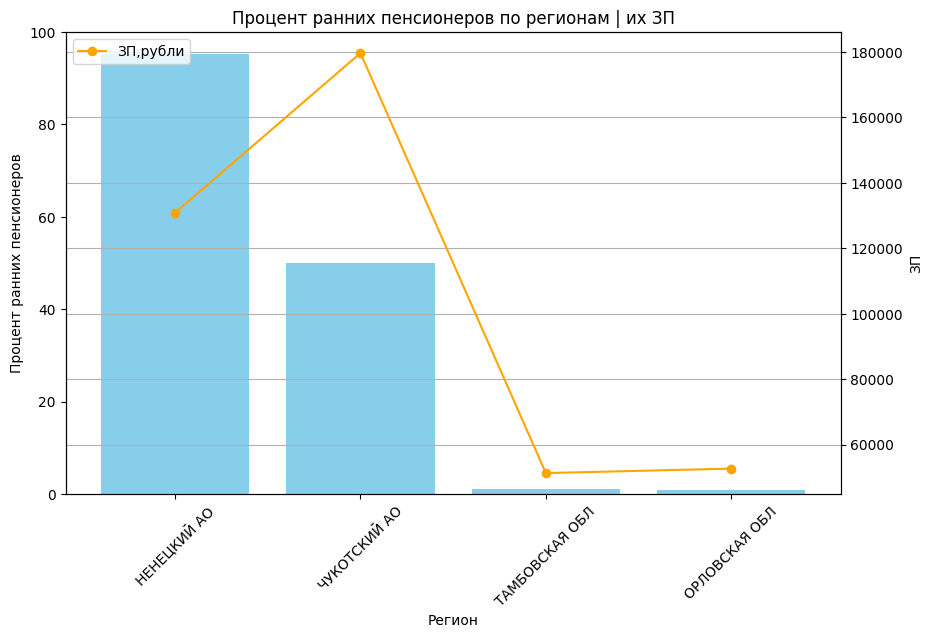

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | их ЗП')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['rubs'], color='orange', marker='o', label='ЗП,рубли')
plt.ylabel('ЗП')
plt.legend(loc='upper left')
plt.grid()
plt.show()

ЗП у ранее вышедших на пенсию больше, чем у тех, кто вышел в положенный срок. Однако, зависимость не совсем линейная

In [56]:
df_dvij = pd.read_excel('estest_dvij_nasel.xlsx')
df_dvij.columns = ['rgn','прибыль населения']
merged_df = pd.merge(filtered_df, df_dvij, on='rgn', how='inner')
merged_df

,rgn,erly_pnsn_flg,прибыль населения
0,НЕНЕЦКИЙ АО,95.238095,-13
1,ЧУКОТСКИЙ АО,50.000000,-36971
2,ТАМБОВСКАЯ ОБЛ,1.066841,-4736
3,ОРЛОВСКАЯ ОБЛ,0.982659,-3368


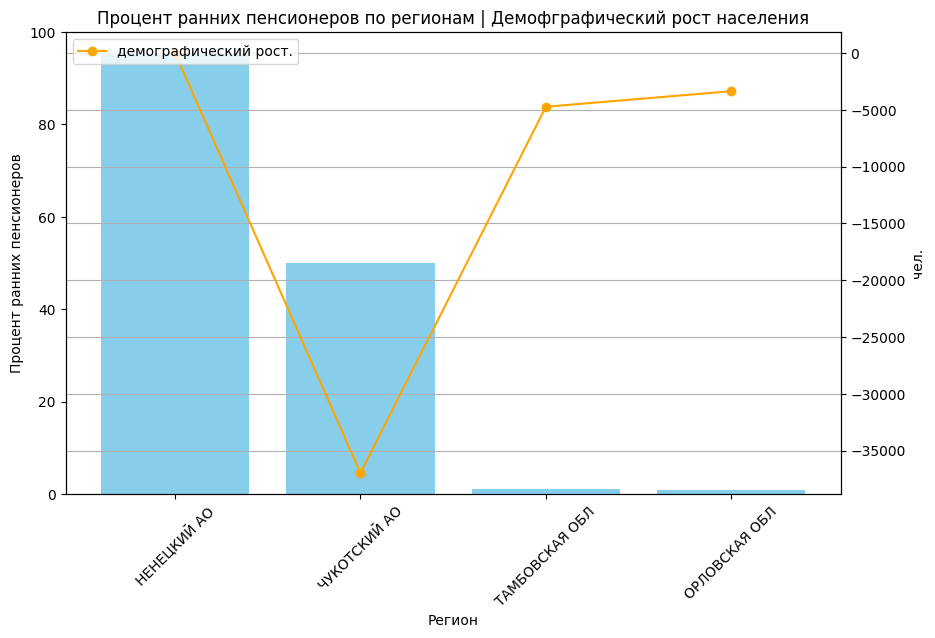

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | Демофграфический рост населения')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['прибыль населения'], color='orange', marker='o', label='демографический рост.')
plt.ylabel('чел.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

наибольшая убыль в Чукотке. Мб этим и объясняются их большие ЗП?

In [58]:

df_ur_jizni = pd.read_excel('osnovnye_pokazateli_ur_jizni.xlsx')
df_ur_jizni.columns = ['rgn','ЗП', 'Траты', 'прибыль']
merged_df = pd.merge(filtered_df, df_ur_jizni, on='rgn', how='inner')
merged_df


,rgn,erly_pnsn_flg,ЗП,Траты,прибыль
0,НЕНЕЦКИЙ АО,95.238095,129519,46263,83256
1,ЧУКОТСКИЙ АО,50.000000,150899,45262,105637
2,ТАМБОВСКАЯ ОБЛ,1.066841,39265,32659,6606
3,ОРЛОВСКАЯ ОБЛ,0.982659,49162,34273,14889


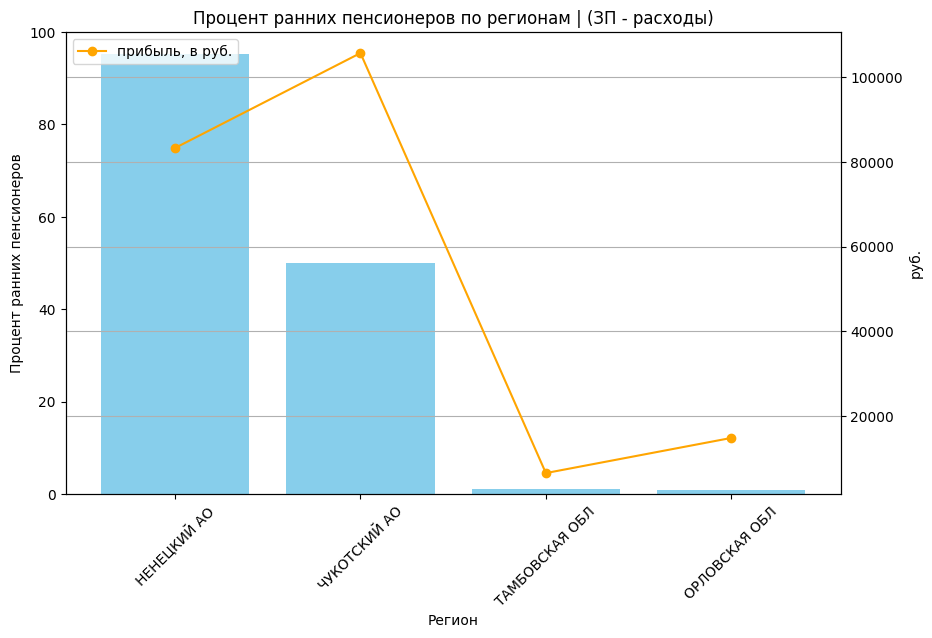

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | (ЗП - расходы)')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['прибыль'], color='orange', marker='o', label='прибыль, в руб.')
plt.ylabel('руб.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

У ранне вышедших на пенсию была большая прибыль во время работы

In [60]:
df_potr_rab = pd.read_excel('potrebnost_v_rabotnikax_rabotadyatel.xlsx')
df_potr_rab.columns = ['rgn','neededNumberHuman']
merged_df = pd.merge(filtered_df, df_potr_rab, on='rgn', how='inner')
merged_df


,rgn,erly_pnsn_flg,neededNumberHuman
0,НЕНЕЦКИЙ АО,95.238095,1307
1,ЧУКОТСКИЙ АО,50.000000,2051
2,ТАМБОВСКАЯ ОБЛ,1.066841,13385
3,ОРЛОВСКАЯ ОБЛ,0.982659,14024


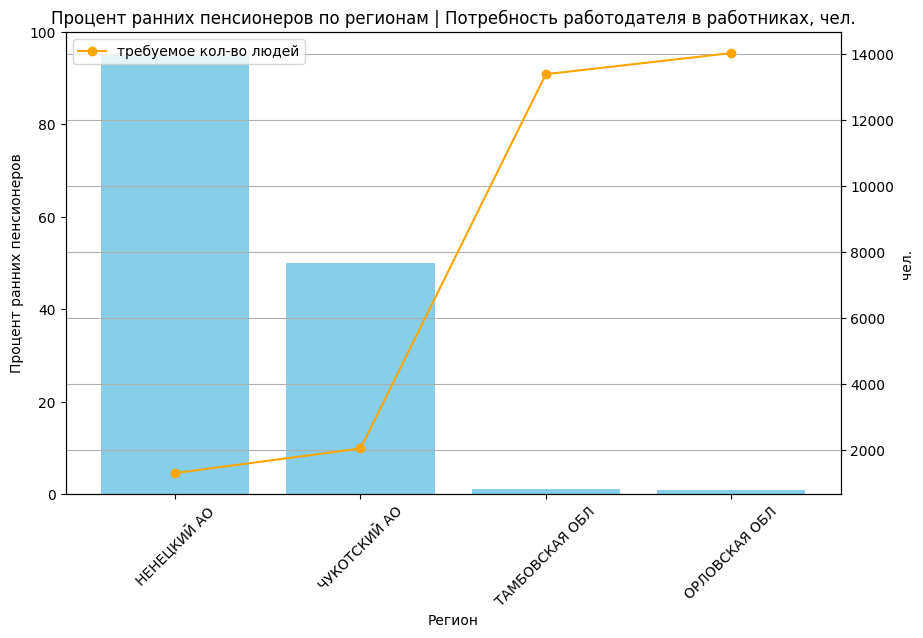

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | Потребность работодателя в работниках, чел.')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['neededNumberHuman'], color='orange', marker='o', label='требуемое кол-во людей')
plt.ylabel('чел.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Там, где людей работодателям требуется больше - процент выхода на раннюю пенсию ниже (спрос рождает предложения?)

In [62]:
df_nagr_vac = pd.read_excel('nagruzka_nezanyatogo_naseleniya_na_100_vak.xlsx')
df_nagr_vac.columns = ['rgn','NeededHuman_on_100']
merged_df = pd.merge(filtered_df, df_nagr_vac, on='rgn', how='inner')
merged_df



,rgn,erly_pnsn_flg,NeededHuman_on_100
0,НЕНЕЦКИЙ АО,95.238095,15.1
1,ЧУКОТСКИЙ АО,50.000000,10.8
2,ТАМБОВСКАЯ ОБЛ,1.066841,13.9
3,ОРЛОВСКАЯ ОБЛ,0.982659,9.7


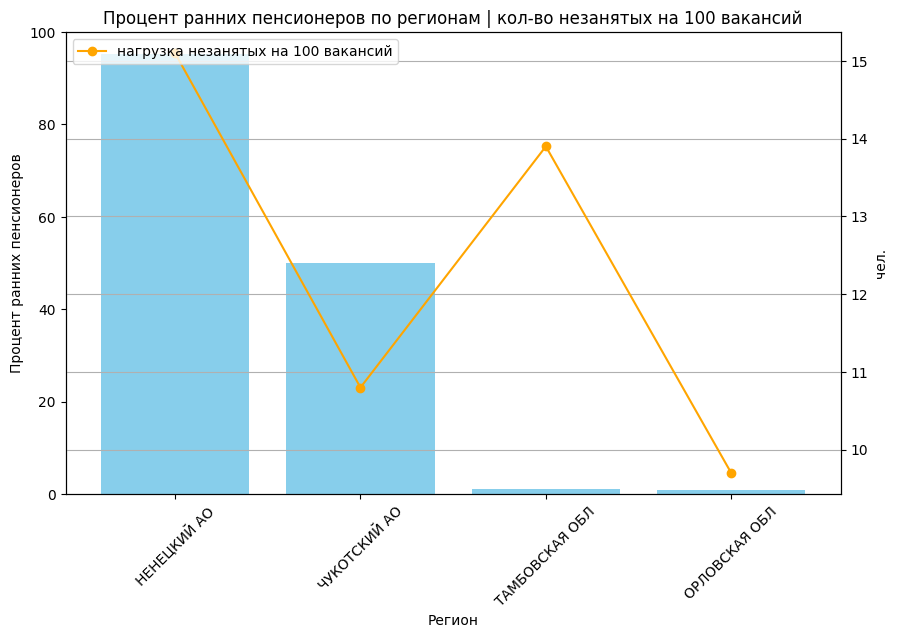

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | кол-во незанятых на 100 вакансий')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['NeededHuman_on_100'], color='orange', marker='o', label='нагрузка незанятых на 100 вакансий')
plt.ylabel('чел.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [64]:
df_potr_usl = pd.read_excel('indexi_potreb_cen_pr_usl.xlsx')
df_potr_usl.columns = ['rgn','rost_v_percent']
merged_df = pd.merge(filtered_df, df_potr_usl, on='rgn', how='inner')
merged_df



,rgn,erly_pnsn_flg,rost_v_percent
0,НЕНЕЦКИЙ АО,95.238095,103.2
1,ЧУКОТСКИЙ АО,50.000000,101.4
2,ТАМБОВСКАЯ ОБЛ,1.066841,103.6
3,ОРЛОВСКАЯ ОБЛ,0.982659,102.7


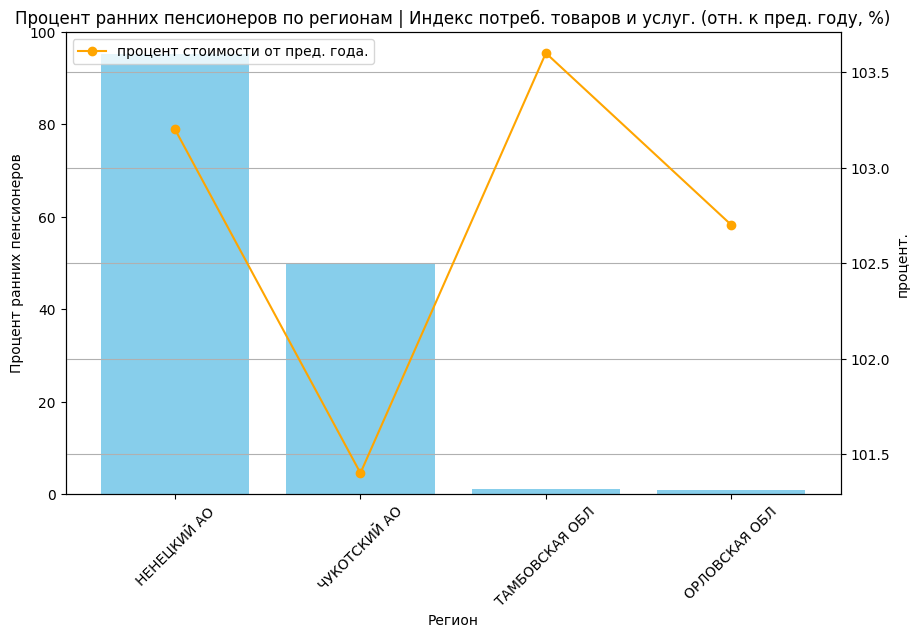

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | Индекс потреб. товаров и услуг. (отн. к пред. году, %)')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['rost_v_percent'], color='orange', marker='o', label='процент стоимости от пред. года.')
plt.ylabel('процент.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Везде цены растут. Однако, там, где меньше ранних пенсионеров - они растут немного быстрее

In [66]:
df_selhz = pd.read_excel('price_index_selskohoz_prod2.xlsx')
df_selhz.columns = ['rgn','rost_v_percent']
merged_df = pd.merge(filtered_df, df_selhz, on='rgn', how='inner')
merged_df


,rgn,erly_pnsn_flg,rost_v_percent
0,НЕНЕЦКИЙ АО,95.238095,108.3
1,ЧУКОТСКИЙ АО,50.000000,106.9
2,ТАМБОВСКАЯ ОБЛ,1.066841,102.3
3,ОРЛОВСКАЯ ОБЛ,0.982659,101.3


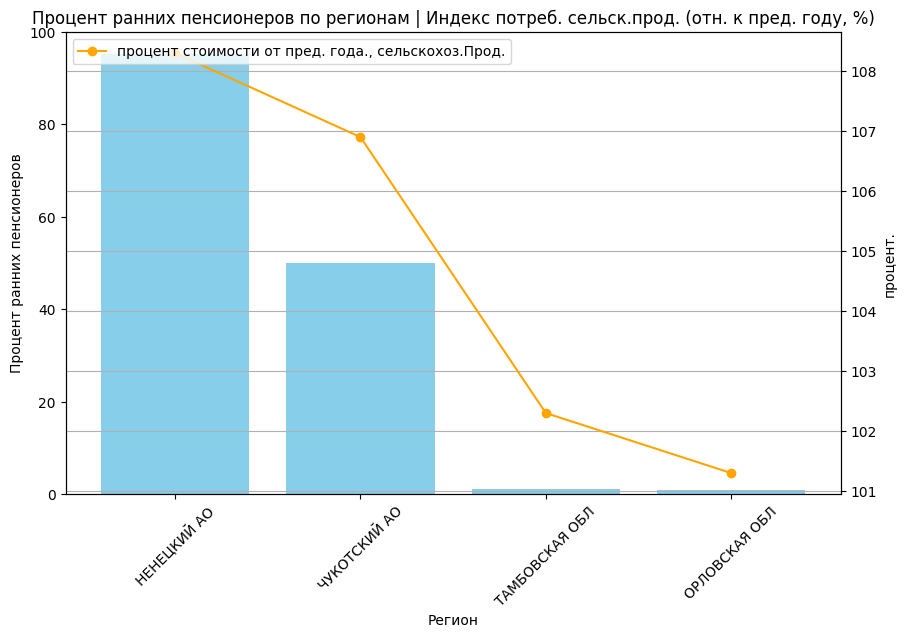

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | Индекс потреб. сельск.прод. (отн. к пред. году, %)')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['rost_v_percent'], color='orange', marker='o', label='процент стоимости от пред. года., сельскохоз.Прод.')
plt.ylabel('процент.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

В регионах, в которых больше ранних пенсионеров - цены на сельскохозяйственные продукты растут быстрее

In [68]:
df_potreb_price = pd.read_excel('ind_port_price_on_product.xlsx')
df_potreb_price.columns = ['rgn','rost_v_percent']
merged_df = pd.merge(filtered_df, df_potreb_price, on='rgn', how='inner')
merged_df

,rgn,erly_pnsn_flg,rost_v_percent
0,НЕНЕЦКИЙ АО,95.238095,101.1
1,ЧУКОТСКИЙ АО,50.000000,101.4
2,ТАМБОВСКАЯ ОБЛ,1.066841,103.1
3,ОРЛОВСКАЯ ОБЛ,0.982659,101.9


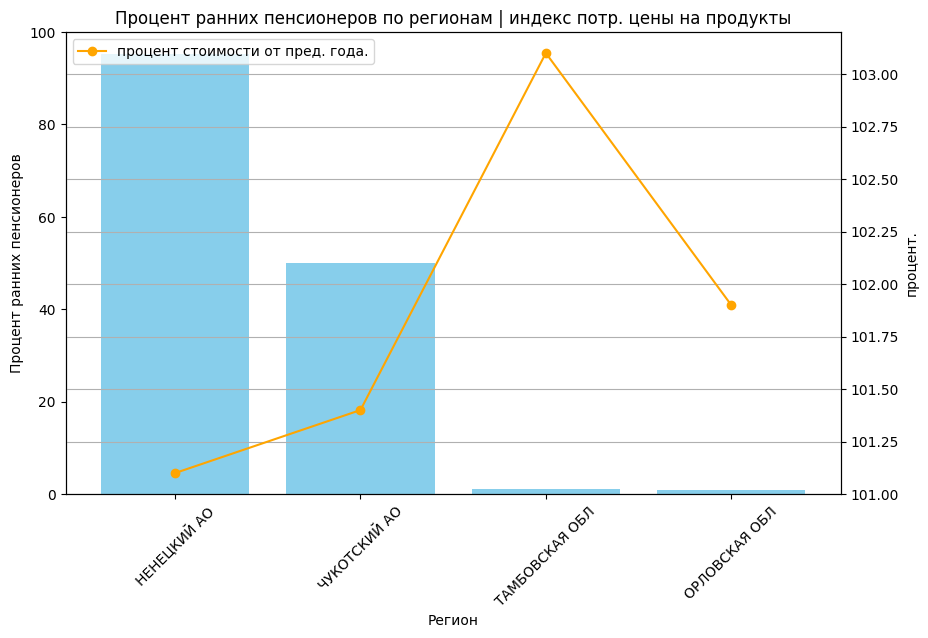

In [69]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['rgn'], merged_df['erly_pnsn_flg'], color='skyblue', label='Процент ранних пенсионеров')
plt.ylabel('Процент ранних пенсионеров')
plt.xlabel('Регион')
plt.title('Процент ранних пенсионеров по регионам | индекс потр. цены на продукты')
plt.xticks(rotation=45)
plt.twinx()  # Создаем второй y-axes
plt.plot(merged_df['rgn'], merged_df['rost_v_percent'], color='orange', marker='o', label='процент стоимости от пред. года.')
plt.ylabel('процент.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Неоднозначно, но рост немного быстрее у тех регионов, которые имеют меньше ранних пенсионеров.